# 1. Analysis of the personalities of the Big Five (IPIP-NEO-300)

In [78]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pycountry

# import seaborn as sns
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE

from sklearn.linear_model import Lasso, LinearRegression
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestRegressor

warnings.filterwarnings("ignore")
pd.options.display.max_columns = 10

%matplotlib inline

### 1.1 Read the dataset

In [79]:
data = pd.read_csv("datasets/Johnson-2014-IPIP-300.tsv.gz", delimiter="\t")

datalen = len(data)
assert datalen > 100000

data.head()

,CASE,SEX,AGE,SEC,MIN,...,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness
0,4,2,36,44,11,...,1.483333,3.850000,4.300000,4.400000,4.48
1,6,1,17,28,23,...,2.566667,3.566667,3.233333,3.000000,3.18
2,9,2,28,0,30,...,2.283333,2.983333,4.350000,3.983333,3.32
3,11,1,17,36,36,...,3.250000,2.416667,2.716667,4.200000,3.70
4,15,2,48,34,49,...,3.416667,3.066667,3.566667,3.900000,4.20


### 1.2 Inspecting the dataframe

In [80]:
print(f"Dataset shape: {data.shape}")
data.describe()

Dataset shape: (145388, 345)


,CASE,SEX,AGE,SEC,MIN,...,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness
count,145388.000000,145388.000000,145388.000000,145388.000000,145388.000000,...,145388.000000,145388.000000,145388.000000,145388.000000,145388.000000
mean,165156.179870,1.582655,24.792927,29.507146,29.567193,...,2.874476,3.356768,3.691381,3.496121,3.591221
std,94431.786752,0.493123,9.567635,17.335350,17.328475,...,0.636464,0.551654,0.440363,0.469215,0.548320
min,4.000000,1.000000,10.000000,0.000000,0.000000,...,1.000000,1.000000,1.266667,1.000000,1.080000
25%,84765.500000,1.000000,18.000000,14.000000,15.000000,...,2.416667,3.000000,3.400000,3.216667,3.220000
50%,164086.000000,2.000000,22.000000,30.000000,30.000000,...,2.850000,3.400000,3.700000,3.533333,3.620000
75%,245206.750000,2.000000,29.000000,45.000000,45.000000,...,3.316667,3.750000,4.000000,3.833333,3.980000
max,334161.000000,2.000000,99.000000,59.000000,59.000000,...,4.966667,4.950000,4.983333,5.000000,5.000000


### 1.3 Check and remove missing value

In [81]:
print(f"Dataset total: {datalen}")
print(f"Is there any missing value? {data.isnull().values.any()}")
print(f"How many missing values: {data.isnull().values.sum()}")

data = data.dropna(inplace=False)

print(f"Number of participants after eliminating missing values: {len(data)}")
print(f"Number of countries: {len(data.COUNTRY.unique())}")

Dataset total: 145388
Is there any missing value? True
How many missing values: 140
Number of participants after eliminating missing values: 145248
Number of countries: 221


## 2. Countries

The tests were carried out by participants from several countries. People of different culture, age and education.

### 2.1 Counting the answers from each country

In [82]:
countries = (
    pd.DataFrame(data.COUNTRY.value_counts())
    .rename(
        columns={x.alpha_2: x.alpha_3 for x in pycountry.countries},
        index={"country": "count"},
    )
)

countries.T.head()

,USA,Canada,UK,Australia,Netherlands,...,Guinea-Biss,Eritrea,Swaziland,Mozambique,Marshall Is
COUNTRY,100608,10382,7680,4978,1853,...,1,1,1,1,1


In [83]:
def get_data(data, *args, n=None):
    if n is not None:
        data = data.sample(n)

    results = []

    for name in args:
        if name == 'domains':
            results.append(data.iloc[:, -5:])
        elif name == 'facets':
            results.append(data.iloc[:, -35:-5])
        elif name == 'items':
            results.append(data.iloc[:, -335:-35])
        else:
            results.append(data[name])

    return results

In [84]:
domains = get_data(data, 'domains', n=1000)[0]

domains.head()

,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness
79940,3.000000,3.350000,3.483333,3.066667,3.74
140805,1.933333,3.400000,3.833333,3.883333,4.26
89953,3.466667,2.033333,3.233333,3.450000,3.20
9137,2.100000,3.466667,3.833333,4.033333,3.92
42301,2.333333,3.766667,3.766667,2.783333,3.48


In [85]:
facets = get_data(data, 'facets', n=1000)[0]

facets.head()

,Achievement-Striving,Activity Level,Adventurousness,Altruism,Anger,...,Self-Discipline,Self-Efficacy,Sympathy,Trust,Vulnerability
98006,4.8,3.9,4.7,4.6,4.6,...,3.8,4.8,4.0,2.0,2.7
34411,3.2,3.5,4.1,3.5,3.3,...,3.1,3.6,3.3,2.2,2.7
120872,4.2,3.3,3.5,3.8,2.4,...,3.7,4.3,3.0,2.5,2.0
69353,4.4,2.4,3.7,3.5,1.7,...,3.1,4.3,3.0,3.5,2.1
31491,3.8,2.4,2.5,3.8,3.3,...,3.2,3.8,3.6,3.4,2.6


# Pearson correlation between columns in domains and age

<AxesSubplot:>

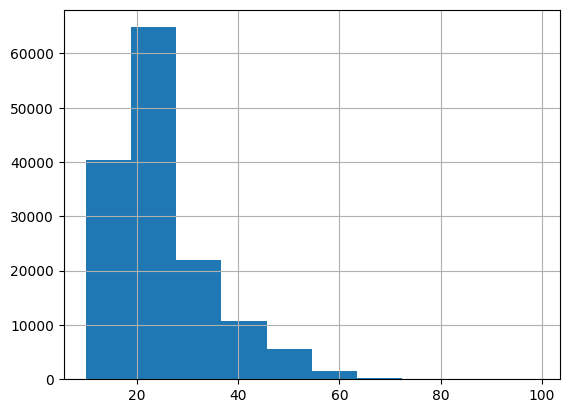

In [86]:
data['AGE'].hist()

In [87]:
domains, age = get_data(data, 'domains', 'AGE')

domains.corrwith(age).round(2)

Neuroticism         -0.12
Extraversion        -0.12
Openness             0.01
Agreeableness        0.16
Conscientiousness    0.25
dtype: float64

In [88]:
def plot_coef_path(estimator, X, y, alpha, ax=None):
    if ax is None:
        ax = plt.figure().gca()
    coefs = np.zeros((X.shape[1], len(alpha)))
    for i, a in enumerate(alpha):
        coefs[:,i] = estimator(alpha=a).fit(X, y).coef_
    ax.plot(alpha, coefs.T)
    ax.set_xlabel("Penalty (alpha)")
    ax.set_ylabel("Coefficient value")
    ax.set_xscale('log')

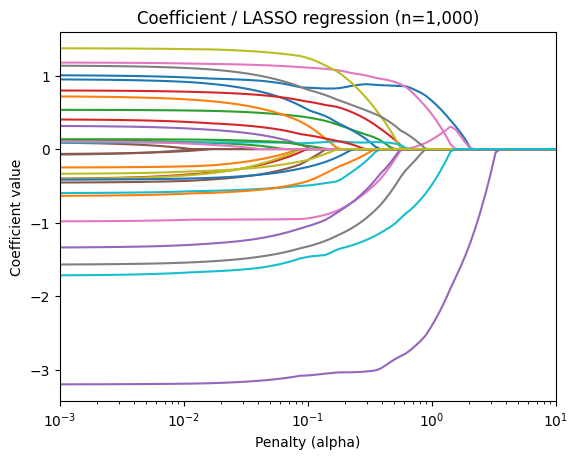

In [91]:
facets, age = get_data(data, 'facets', 'AGE', n=1000)

facets = scale(facets)

alpha = np.logspace(-3, 1, 100)
plot_coef_path(Lasso, facets, age, alpha)

plt.title("Coefficient / LASSO regression (n=1,000)", fontsize=12)
plt.xlim(1e-3, 10);

In [96]:
from matplotlib.ticker import ScalarFormatter
from sklearn.model_selection import learning_curve

def plot_learning_curves(estimators, X_sets, y, train_sizes, labels=None, errors=True, **kwargs):
    n_col = len(X_sets)
    fig, axes = plt.subplots(1, n_col, figsize=(4.5 * n_col, 4), sharex=True,
                             sharey=True)
    
    if n_col == 1:
        axes = [axes]

    if not isinstance(estimators, (list, tuple)):
        estimators = [estimators] * n_col
    
    cv = kwargs.pop('cv', 10)
    
    for i in range(n_col):
        ax = axes[i]
        results = learning_curve(estimators[i], X_sets[i], y,
                                 train_sizes=train_sizes, shuffle=True,
                                 cv=cv, **kwargs)
        train_sizes_abs, train_scores, test_scores = results
        train_mean = train_scores.mean(1)
        test_mean = test_scores.mean(1)
        ax.plot(train_sizes_abs, train_mean, 'o-', label='Train',
                lw=3)
        ax.plot(train_sizes_abs, test_mean, 'o-', label='Test',
                lw=3)
        axes[i].set_xscale('log')
        axes[i].xaxis.set_major_formatter(ScalarFormatter())
        axes[i].grid(False, axis='x')
        axes[i].grid(True, axis='y')
        if labels is not None:
            ax.set_title(labels[i], fontsize=16)
        ax.set_xlabel('Num. obs.', fontsize=14)
        
        if errors:
            train_sd = train_scores.std(1)
            test_sd = test_scores.std(1)
            ax.fill_between(train_sizes, train_mean - train_sd,
                            train_mean + train_sd, alpha=0.2)
            ax.fill_between(train_sizes, test_mean - test_sd,
                            test_mean + test_sd, alpha=0.2)
    
    plt.legend(fontsize=12)
    plt.ylim(0, 1)
    axes[0].set_ylabel('$R^2$', fontsize=14)
    axes[-1].set_ylabel('$R^2$', fontsize=14)
    axes[-1].yaxis.set_label_position("right")

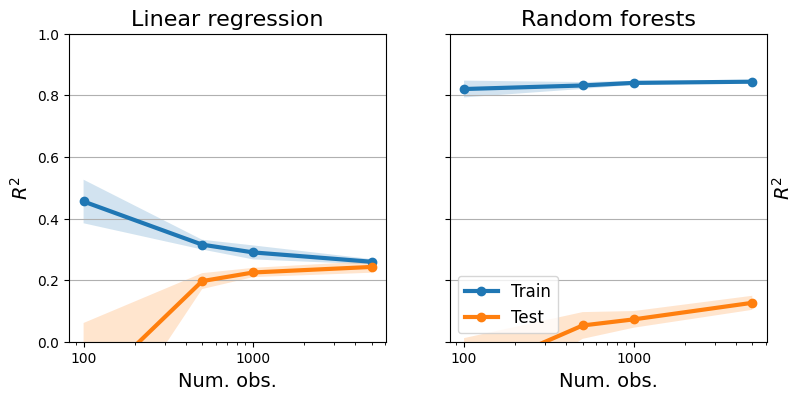

In [97]:
facets, age = get_data(data, 'facets', 'AGE')

estimators = [LinearRegression(), RandomForestRegressor(10)]
labels = ["Linear regression", "Random forests"]

plot_learning_curves(estimators, [facets, facets], age, [100, 500, 1000, 5000], labels)